<a href="https://colab.research.google.com/github/FernandoGuirraS/sigmoidal_data_science/blob/main/Analisando_bitcoin_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando dados do Yahoo Finance com Pandas

O Yahoo! Finance é uma propriedade que faz parte do Yahoo! onde é fornecido notícias financeiras, dados e comentários, além cotações de ações, relatórios financeiros, entre outros. Dentre eles, se encontra a cotação histórica do preço do Bitcoin.

## Bitcoin 

Para falarmos sobre o Bitcoin, vamos, inicialmente, definir alguns termos fundamentais.

### Definições básicas

A **blockchain** é um livro-razão compartilhado e imutável usado para registrar transações, rastrear ativos e aumentar a confiança.

Uma **criptomoeda** é o nome dado as moedas digitais onde o objetivo é ser um meio de troca onde é utilizado da tecnologia blockchain para realização de trocas e criação de novas unidades, onde é assegurado a validade das transações devido a essa tecnologia.

As criptomoedas se dividem em centralizadas e descentralizadas:

* *Centralizadas*: significa que existe algum intermedeador, bancos ou governos, que estabelecem uma moeda, controlam o fluxo e regras para manter a moeda. 
* *Descentralizadas*: significa que não existem bancos ou governos que atuam como intermediários.

O **Bitcoin** é uma criptomoeda descentralizada, implementado em 2008 por Satoshi Nakamoto (até hoje não foi descoberto sua verdadeira identidade), para ser uma moeda e um meio de trocas entre usuários, com transações **P2P** . O bitcoin é uma forma de dinheiro, assim como o real, dolar, mas é totalmente digital, como um dinheiro eletrônico (ao pé da letra).

Desde a sua criação, houve uma explosão nos preços e ganhos de investidores. De 2016 até o momento, a moeda já acumula mais de $12000\%,$ segundo dados disponibilizados pelo Google, tornando a queridinha entre os investidores.

Nesse notebook, vamos realizar a análise das cotações do Bitcoin, com a biblioteca Pandas, atráves de dados do Yahoo Finance. Os dados serão baixados através da biblioteca *yfinance.* 



## Coletando dados

O Pandas é uma das principais bibliotecas da linguagem python, onde é possível fazer a manipulação de arquivos de dados, como por exemplo em extensões `.csv` ou `.xlsx`. É possível realizar a tranformação em DataFrame para transformação do banco de dados em um arquivos de linhas e colunas. A partir dai é possível realizar as manipulações e análises.

Os dados serão baixados do Yahoo Finance através da biblioteca *[yfinance](https://pypi.org/project/yfinance/),* que é uma ferramenta de código aberto que usa APIs disponíveis publicamente do Yahoo e se destina a fins educacionais e de pesquisa, oferecendo uma maneira segmentada e Pythônica de baixar dados de mercado do Yahoo Finance.

Vamos iniciar realizando o download da biblioteca yfinance e depois a importação, juntamente com a biblioteca pandas.

In [1]:
# instalando a biblioteca yfinance
!pip install yfinance -q

     |████████████████████████████████| 6.3 MB 32.7 MB/s 


In [32]:
# importando bibliotecas necessárias para analise
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

A biblioteca *yfinance* necessita de alguns parâmetros necessários para realizar o download dos dados financeiros de um determinado ativo. Abaixo, vamos instruir os principais parâmetros para download dos dados:

1.   `tickers` - string indicando o nome do ativo, de acordo como está escrito no yahoo finance. Pode ser apenas um ou mesmo uma lista de ativos;
2.   `start` - string indicando a data de início da cotação;
3. `end` - string indicando a data final da cotação desejada;

É importante assegurar que os parâmetros `start` e `end` devem estar entre as datas que o ativo possui cotação.

Abaixo vamos realizar o download das cotações do Bitcoin, cujo nome no yahoo é BTC-USD, entre os anos de $2017$ a $2021$.

Ao final da execução, se for bem sucedido, a saída será apresentado como se o arquivo tivesse sido carregado.


In [3]:
# realizando o download do ativo, com data de inicio e fim
tickers = 'BTC-USD'
start = '2017-01-01'
end = '2021-11-29'

df = yf.download(tickers, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


## Análise dos Dados

Os dados extraídos do Yahoo Finance, através da biblioteca yfinance, está salva na variável df em formato de um dataframe, com as colunas e os índices do dataset. Abaixo, vamos descrever o significado de cada variável para melhor entendimento.

**Dicionário dos índices:**

* `Date` - índice que indica o dia da cotação;
* `Open` - variável representando o preço de abertura da cotação do ativo;
* `High` - variável representando o maior preço que o ativo atingiu na cotação diária;
* `Low` - variável representando o menor preço que o ativo atingiu na cotação diária;
* `Close` - variável representando o preço de fechamento da cotação do ativo;
* `Adj Close` - variável representando o preço ajustado do ativo, incluindo quaisquer distribuições de proventos, na cotação diária.

Para analisar a distribuição dos dados, vamos analisar as primeiras $5$ linhas do dataset.

In [4]:
# exibindo primeiras 5 linhas do ativo
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008


### Quantas entradas e variáveis o dataset possui?

Como o objetivo do estudo é apresentar a biblioteca Pandas e Yfinance, a análise será feita de maneira inicial. Para isso, foi escolhido um dataset resumido, de apenas $4$ anos, entre os anos de $2017$ a $2021$. Os dados disponíveis pelo Yahoo Finance possuem cotações parte de meados de $2014$, o que torna o número de entradas maiores, sendo mais recomendado para análises mais específicas.

O dataset de estudo possui $1790$ entradas e $6,$ onde os dados disponíveis vão de $01$ de Janeiro de $2017$ ao dia $29$ de Novembro de $2021$. 

In [5]:
# exibindo o número de entradas e variaveis atraves do shape
print("Entradas: {}".format(df.shape[0]))
print("Variáveis: {}".format(df.shape[1]))

Entradas: 1790
Variáveis: 6


### Qual a porcentagem de valores ausentes?

Os valores ausentes indica a qualidade dos dados de um dataset. Para isso, é muito importante identificar a quantidade de valores ausentes que o dataset apresenta para ser tomadas as medidas necessárias para cada situação.

Os dados baixados do Bitcoin apresentam nenhuma variável com valor faltante. Isso se dá pelo fato de o arquivo de dados ser hospedado em uma página web de finanças, onde são encontradas cotações e relatórios. Isso torna o dataset de boa qualidade, onde as análise serão feitas com a totalidade dos dados iniciais.

In [6]:
# porcentagem de dados ausentes
df.isnull().sum() / df.shape[0]

Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64

### Qual o tipo das variáveis?

Através da função `info` podemos observar duas informações importantes que é retornado. Primeiro, retorna o tipo de cada variável. A predominância são variáveis do tipo *float*, pelo fato das variáveis principais se tratar do preço do ativo no dia. A função ainda retorna a quantidade de valores nulos que cada variável possui. Como foi observado anteriormente, pode - se constatar que nenhuma variável apresenta valor ausente.

In [7]:
# informações gerais do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1790 entries, 2017-01-01 to 2021-11-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1790 non-null   float64
 1   High       1790 non-null   float64
 2   Low        1790 non-null   float64
 3   Close      1790 non-null   float64
 4   Adj Close  1790 non-null   float64
 5   Volume     1790 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 97.9 KB


No arquivo de dados, disponível quando baixado no Yahoo Finance, é possível observar que `Date` é uma variável do tipo *object*, o que pode atrapalhar nas análise, onde deve ser transformada para uma variável do tipo *datetime*. Como o download dos dados é feito pela biblioteca *yfinance,* é possível observar abaixo que seu tipo é transformado para datetime e sendo utilizada como index do dataframe, o que ajuda nas análise, principalmente pelo fato da análise de séries temporais.

In [8]:
# tipo do index
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

### Informações estatísticas sobre as variáveis

As informações estatísticas é dada pela função *describe* onde é possível verificar a média, desvio padrão, os quartis e valores de mínimo e máximo.

Como as variáveis são cotações diárias de um ativo, podemos observar que os valores são bem próximos um do outro. Podemos observar que o valor máximo alcançado foi próximo de $68\mathrm{k}$ dólares e o valor mínimo próximo de $800$ dólares. A média dos valores está próximo de $15\mathrm{k}$ dólares. Quando comparado com a mediana, observamos que $50\%$ dos dados estão abaixo de $8600$ dólares. Ao compararmos esses valores com o máximo, podemos observar uma diferença altíssima dos valores. Isso se dá pela alta que o ativo teve entre os anos de $2020$ e $2021$, algo que será constatado visualmente posteriormente.

In [9]:
# informações estatisticas do dataframe
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1.790000e+03
mean,14876.682043,15291.710794,14429.045578,14905.806842,14905.806842,2.065872e+10
std,16504.581471,16970.419080,15981.895074,16527.838488,16527.838488,2.116678e+10
min,775.177979,823.307007,755.755981,777.757019,777.757019,6.085170e+07
25%,5327.780884,5465.748291,5233.410156,5341.096313,5341.096313,4.497688e+09
50%,8518.910156,8716.208496,8259.235352,8532.005371,8532.005371,1.583334e+10
75%,12528.843750,13141.182129,11826.424072,12761.220215,12761.220215,3.192955e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


## Visualização dos Dados

### Qual a distribuição das variáveis?

Como as variáveis são bem parecidas, podemos observar que o preço predominante das observações se concentram abaixo de $20\mathrm{k}$ dólares. Houve um aumento no preço, entre o ano de $2021$, mas o preço predominante das cotações estão abaixo de $20\mathrm{k}$.

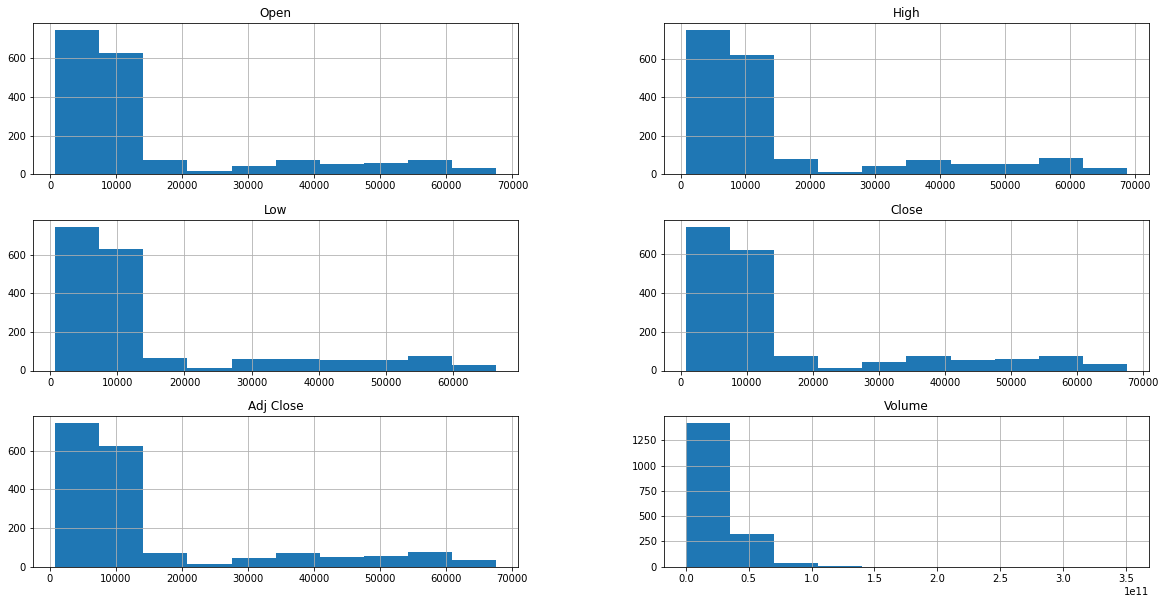

In [11]:
# histograma das variáveis
df.hist(figsize=(20, 10));

### Qual o comportamento do preço no tempo?

Para análise dos preços vamos focar na variável `Adj Close`, que possui comportamento do preço final reajustado adicionado de algum provento, caso houver. 
O preço mínino do *dataset* é próximo de $800$ dólares. Houve um grande aumento no final de $2017$ e início de $2018$, onde o preço chegou atingir quase $20\mathrm{k}$ dólares. Entre $2018$ e meados de $2021$, o preço estagnou passando por um período de inverno, sem trazer grandes retornos. No final de $2020$ e início de $2021$, o preço apresentou um forte alta, chamando atenção de vários investidores. Teve uma breve correção mas seguiu trazendo retorno aos seus investidores.

In [14]:
# preço minimo do fechamento ajustaço 
df['Adj Close'].min()

777.7570190429688

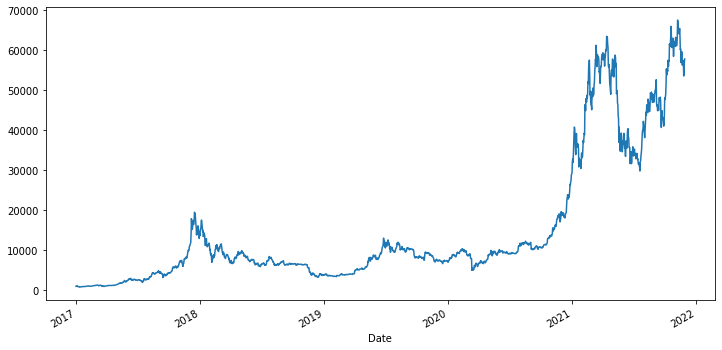

In [17]:
# Grafico de linhas da variável Adj Close
df['Adj Close'].plot(figsize=(12,6));

### Boxplot da variável `Adj Close`

Como o papel do cientista de dados é procurar anormalidade nos dados, o **boxplot** consegue identificar padrões nos dados, retornando a possibilidade de alguns *outliers* nos dados.

Como podemos observar anteriormente, a grande maioria dos dados se encontra abaixo de $20\mathrm{k}$. Pelo gráfico abaixo, podemos observar que a mediana dos dados apresenta valores abaixo de $10\mathrm{k}$ dólares. E o preço máximo está próximo de $25\mathrm{k}$ dólares. Os valores acima seriam identificados como outliers, mas o comportamento do mercado financeiro é diferente da realidade de demais evento. Existem diversas variáveis que pode alterar o preço de um ativo. Dentre eles está a grande quantidade de compradores e detentores dos ativos, como a lei da oferta e da demanda. Os valores acima representam uma alta que o Bitcoin apresentou referente aos anos anteriores. Um crescimento de mais de $600\%,$ onde esses dados não podem ser descartados do *dataset*.

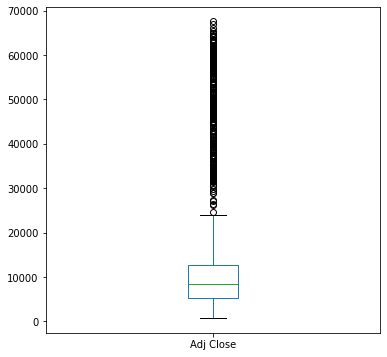

In [22]:
# boxplot
df['Adj Close'].plot(kind='box', figsize=(6,6));

### Qual a quantidade de Volume?

O `Volume` representa o número de ativos negociados em um determinado período de tempo. No gráfico acima, verificamos o forte aumento no preço do Bitcoin no ano de $2021.$ Como podemos observar abaixo, no final de $2020$ e início de $2021,$ houve um grande aumento no número de negocioações de Bitcoin, fazendo com que o preço aumentasse devido a grande procura por parte dos investidores. Mas será que existe alguma relação entre preço e volume? Vamos verificar a seguir?

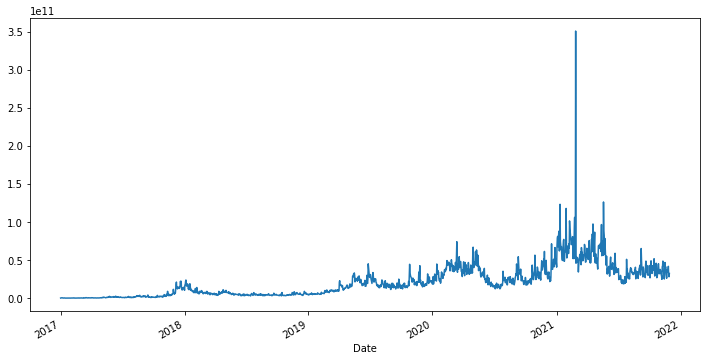

In [26]:
# grafico de linhas do volume
df.Volume.plot(figsize=(12,6));

### Existe alguma relação entre preço e volume? Qual a *Correlação* entre as variáveis?

Como as variáveis são variáveis do preço diário do Bitcoin, representando o preço mais baixo, mais alto, ajustado e de abertura, indica que estão diretamente ligada uma as outras, representado $100\%$ de correlação. A única que foge um pouco é o `Volume`, mas que apresenta uma relação alta com o preço do ativo.

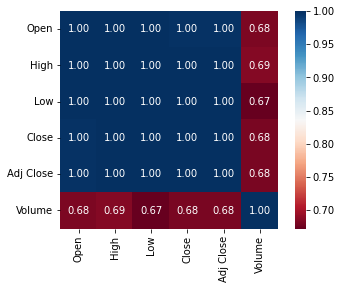

In [52]:
# extraindo correlação do dataframe
corr = df.corr()

# visualização da matriz de correlação
sns.heatmap(corr, square=True, annot=True, fmt='.2f', cmap='RdBu');

### Preço Ajustado $\times$ Volume

Como a correlação entre as duas variáveis é um pouco baixa, não notamos uma grande diferença entre as duas variáveis. Mas verificamos uma concentração mais próxima para valores abaixo de $10\mathrm{k}$ dólares e quanto mais o valor cresce, maior a dissipação dos dados do volume. Ou seja, quanto maior o preço do bitcoin, maior vai sendo o volume de negocioação. 

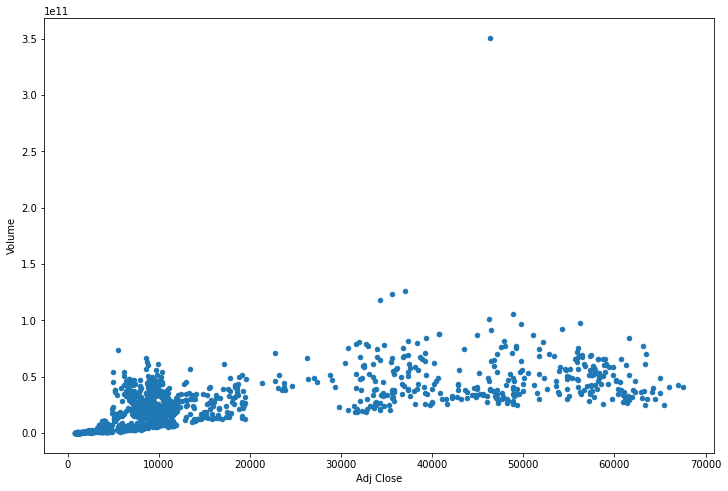

In [55]:
df.plot(kind='scatter', x='Adj Close', y='Volume', figsize=(12,8));

### Preço Ajustado e Volume em um mesmo gráfico

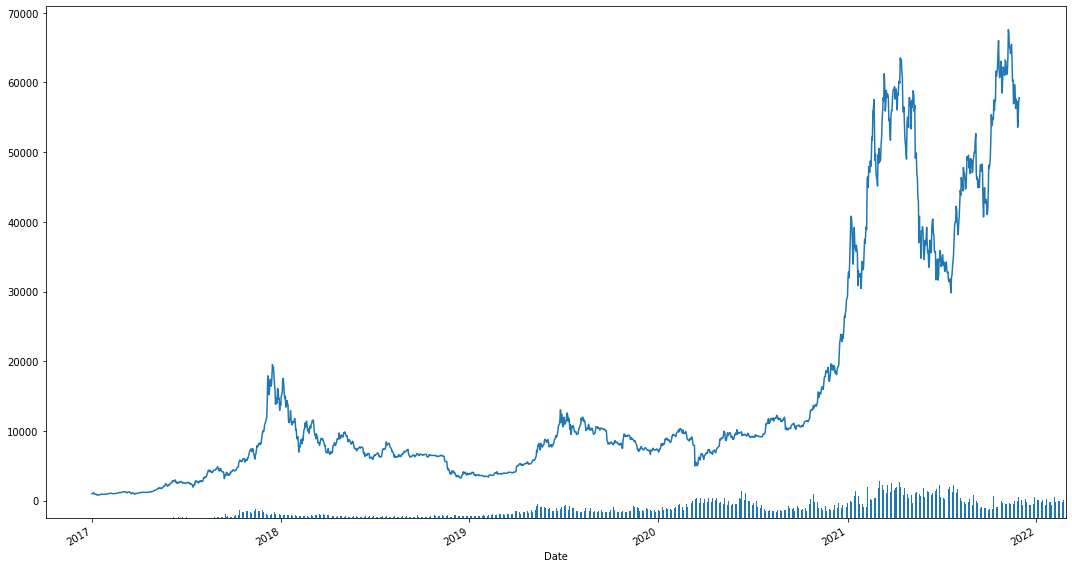

In [96]:
# Gerandoo ambiente figure
fig = plt.figure(figsize=(15,8))

# Plotando grafico de linhas
fig.add_subplot(1, 1, 1)
df['Adj Close'].plot()


# Plotando grafico de barras
fig.add_subplot(3, 1, 3)   
df.Volume.plot(kind='bar') 
plt.axis('off')
plt.tight_layout();

## Conclusão

Não foi a toa que o **Bitcoin** virou o queridinho da maioria dos investidores, por seus altos ganhos. E esse notebook teve o objetivo de realizar uma abordagem inicial, com as bibliotecas *Pandas* e *Yfinance*, para extrair informações importantes das cotações diária do preço do bitcoin disponibilizadas no Yahoo Finance.

Lembrando que isso não é uma dica de investimento.

Devido o alto retorno que o *Bitcoin* trouxe desde a sua criação, você teria coragem de entrar nesse mercado e surfar pelas altas da moeda digital?

#### Referências

[Dez formas de explicar o Bitcoin](https://www.infomoney.com.br/colunistas/moeda-na-era-digital/dez-formas-de-explicar-o-que-e-bitcoin/)

[Yfinance](https://pypi.org/project/yfinance/)

[Yahoo Finance - BTC](https://finance.yahoo.com/quote/BTC-USD?p=BTC-USD&.tsrc=fin-srch)

[Como analisar ações da Bolsa com Python](https://sigmoidal.ai/como-analisar-acoes-da-bolsa-com-python/)

[Como usar o Histograma para Data Science](https://sigmoidal.ai/como-usar-o-histograma-para-data-science/)
